In [1]:
pwd


'C:\\Users\\Nikhil Munigela'

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("assets/dataset.txt", sep = ",", names = ["id", "longtitude", "latitude", "altitude"])

In [6]:
df.head()


id  longtitude   latitude   altitude
0  144552912    9.349849  56.740876  17.052772
1  144552912    9.350188  56.740679  17.614840
2  144552912    9.350549  56.740544  18.083536
3  144552912    9.350806  56.740484  18.279465
4  144552912    9.351053  56.740486  18.422974

In [36]:
#Normalizing Data
df = (df-df.mean())/df.std()
df

id  longtitude  latitude  altitude
0       1.236558   -0.608892 -1.184481 -0.275681
1       1.236558   -0.608350 -1.185162 -0.245492
2       1.236558   -0.607776 -1.185625 -0.220318
3       1.236558   -0.607366 -1.185832 -0.209794
4       1.236558   -0.606972 -1.185826 -0.202086
5       1.236558   -0.606300 -1.185771 -0.164385
6       1.236558   -0.605260 -1.185576 -0.139371
7       1.236558   -0.604793 -1.185442 -0.137697
8       1.236558   -0.604532 -1.185333 -0.135647
9       1.236558   -0.604306 -1.185217 -0.144738
10      1.236558   -0.603748 -1.184741 -0.158725
11      1.236558   -0.603225 -1.184382 -0.212275
12      1.236558   -0.602707 -1.184053 -0.246244
13      1.236558   -0.601989 -1.183846 -0.243905
14      1.236558   -0.601348 -1.183529 -0.203455
15      1.236558   -0.601020 -1.183340 -0.178368
16      1.236558   -0.600498 -1.183121 -0.211498
17      1.236558   -0.600144 -1.183048 -0.223723
18      1.236558   -0.599754 -1.183024 -0.207480
19     -1.453641   -1.827012 -0.252598  0.531327
20     -1.453641   -1.827778 -0.254891  0.350577
21     -1.453641   -1.830581 -0.258552  0.133332
22     -1.453641   -1.831044 -0.259800 -0.019722
23     -1.453641   -1.831954 -0.262250 -0.270884
24     -1.453641   -1.832022 -0.262432 -0.276442
25     -1.453641   -1.833037 -0.265162 -0.424747
26     -1.453641   -1.834005 -0.267679 -0.435756
27     -1.453641   -1.865074 -0.209541  0.012530
28     -1.453641   -1.866203 -0.210655 -0.088126
29     -1.453641   -1.867117 -0.210359  0.074151
...          ...         ...       ...       ...
434844 -0.120437    0.336208  1.444140  0.221767
434845 -0.120437    0.336773  1.444020  0.229472
434846 -0.120437    0.337268  1.443802  0.244624
434847 -0.120437    0.338106  1.443324  0.225304
434848 -0.120437    0.338842  1.442846  0.203946
434849 -0.120437    0.339633  1.442284  0.202372
434850 -0.120437    0.344703  1.459549  0.446238
434851 -0.120437    0.338499  1.433631  0.134834
434852 -0.120437    0.337627  1.433904  0.124519
434853 -0.120437    0.331849  1.447532  0.143108
434854 -0.120437    0.331642  1.445295  0.143082
434855 -0.120437    0.331608  1.444837  0.152360
434856 -0.120437    0.331385  1.444638  0.150090
434857 -0.120437    0.331266  1.444419  0.161169
434858 -0.120437    0.331197  1.443623  0.163453
434859 -0.120437    0.331009  1.441552  0.177811
434860 -0.120437    0.330975  1.440377  0.135134
434861 -0.120437    0.330770  1.439680  0.087669
434862 -0.120437    0.330308  1.438923 -0.023594
434863 -0.120437    0.329607  1.438346 -0.083563
434864 -0.120437    0.329196  1.438027 -0.111846
434865 -0.120437    0.328752  1.437828 -0.104066
434866 -0.120437    0.328324  1.437828 -0.139553
434867 -0.120437    0.327777  1.437788 -0.149318
434868 -0.120437    0.327127  1.437449 -0.114603
434869 -0.120437    0.326203  1.436812 -0.110182
434870 -0.120437    0.324955  1.435916 -0.086181
434871 -0.120437    0.323860  1.435418 -0.131715
434872 -0.120437    0.337360  1.423800  0.098916
434873 -0.120437    0.337317  1.425013  0.131587

[434874 rows x 4 columns]

In [9]:
valueArray = df.to_numpy()
#Splitting dataset using 70-30 cross validation technique
train_size = int(0.7 * valueArray.shape[0])
train_X = valueArray[0:train_size, 1:3]
train_X = np.insert(train_X,0,1,axis=1) #Adding bias
train_Y = valueArray[0:train_size, 3:]
test_X = valueArray[train_size + 1:, 1:3]
test_X = np.insert(test_X,0,1,axis=1) #Adding bias
test_Y = valueArray[train_size + 1:, 3:]

In [10]:

def gradientDescent(X, Y, alpha, maxIterations, weights):
    """
    This function implements all the batch gradient descent with no regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    costs = []
    iters = []
    trainX = X
    trainY = Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration % 20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {}".format(iteration+1,alpha))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [11]:
def gradientDescentWithL1Regularization(X, Y, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L1 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    validationSize = int(0.1 * X.shape[0])
    validationX = X[0:validationSize]
    trainX = X[validationSize+1:]
    validationY =  Y[0:validationSize]
    trainY = Y[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        c = (regParameter)/(2 * m)
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0) + c * np.sign(weights)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1) 
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1) 
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [12]:
def gradientDescentWithL2Regularization(X, Y, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L2 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points. 
    """
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    validationSize = int(0.1 * X.shape[0])
    validationX = X[0:validationSize]
    trainX = X[validationSize+1:]
    validationY =  Y[0:validationSize]
    trainY = Y[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2) 
        weights = (1 - alpha*regParameter/m)*weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))                             
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [13]:
def stochasticGradientDescent(X, Y, alpha, maxIterations, weights):
    """
    This function implements stochastic gradient descent.
    In each iteration, gradient is calculated w.r.t. each training example
    so weights are updated 'm' times in each iteration.
    """
    costs = []
    iters = []
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = shuffledData[:, 0 : 3]
    trainY = shuffledData[:, 3 :]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        for i in range(m):
            gradient = trainX[i].dot(weights.T) - trainY[i]
            weights = weights - (alpha/m) * (gradient * trainX[i])
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)    
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-5:
            break
        prevCost = currCost
        
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {}".format(iteration+1,alpha))        
    plt.title("Stochastic Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights


In [14]:
def normalEquations(X, Y):
    """
    This function implements vectorization based linear regression.
    AW = B where A = X^T.X, B = X^T.Y. This is known as Normal Equation
    W = inv(A).B
    """  
    trainX = X
    trainY = Y
    A = trainX.T.dot(trainX)
    B = trainX.T.dot(trainY)
    weights = np.linalg.inv(A).dot(B)
    return weights


In [15]:
#Training our models

Optimal Cost is 0.49843225035306166
Converting at 1637th iteration with learning rate 0.01


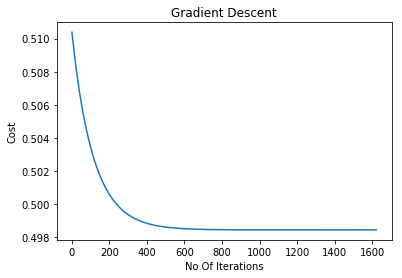

In [16]:
batch_weights = gradientDescent(train_X, train_Y, 0.01, 2000, np.zeros([1,3]))

In [17]:
batch_weights

array([[ 0.00703915,  0.15126783, -0.17967155]])

Optimal Cost is 0.5034406756246214
Converting at 867th iteration with learning rate 0.02 and 0.7 regularization parameter


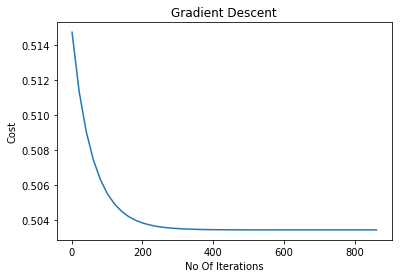

In [18]:
L1_weights = gradientDescentWithL1Regularization(train_X, train_Y, 0.02, 2000, np.zeros([1,3]), 0.7)

In [19]:
L1_weights

array([[-0.00427202,  0.14669433, -0.17747619]])

Optimal Cost is 0.5034405942759956
Converting at 1135th iteration with learning rate 0.015 and 0.8 regularization parameter


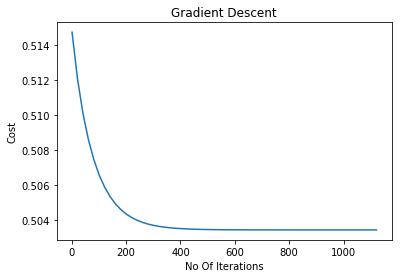

In [20]:
L2_weights = gradientDescentWithL2Regularization(train_X, train_Y, 0.015, 2000, np.zeros([1,3]), 0.8)

In [21]:
L2_weights

array([[-0.00427118,  0.14667523, -0.17745728]])

Optimal Cost is 0.49866216575426614
Converting at 93th iteration with learning rate 0.05


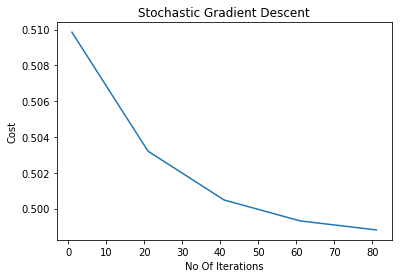

In [22]:
stochastic_weights = stochasticGradientDescent(train_X, train_Y, 0.05, 250, np.zeros([1,3]))

In [23]:
stochastic_weights

array([[ 0.00768555,  0.12788922, -0.15663335]])

In [24]:
normal_weights = normalEquations(train_X, train_Y)

In [25]:
normal_weights

array([[ 0.00703378],
       [ 0.15143569],
       [-0.17983689]])

In [29]:
normal_eqns_weights = normal_weights.T
normal_eqns_weights

array([[ 0.00703378,  0.15143569, -0.17983689]])

In [33]:
print(batch_weights[0],'\n',L1_weights[0],'\n',L2_weights[0],'\n',stochastic_weights[0],'\n',normal_eqns_weights[0],'\n')

[ 0.00703915  0.15126783 -0.17967155] 
 [-0.00427202  0.14669433 -0.17747619] 
 [-0.00427118  0.14667523 -0.17745728] 
 [ 0.00768555  0.12788922 -0.15663335] 
 [ 0.00703378  0.15143569 -0.17983689] 



In [34]:
test_X

array([[1.        , 0.55964587, 1.18366755],
       [1.        , 0.5575142 , 1.18490909],
       [1.        , 0.5571039 , 1.18505867],
       ...,
       [1.        , 0.32386038, 1.43541823],
       [1.        , 0.33736037, 1.42380047],
       [1.        , 0.33731654, 1.42501299]])

In [35]:
test_Y

array([[ 0.21113649],
       [ 0.22721331],
       [ 0.22348129],
       ...,
       [-0.13171477],
       [ 0.09891563],
       [ 0.13158671]])

In [37]:
train_X

array([[ 1.        , -0.60889197, -1.18448067],
       [ 1.        , -0.60835032, -1.18516189],
       [ 1.        , -0.60777632, -1.18562479],
       ...,
       [ 1.        ,  0.55916416,  1.18552813],
       [ 1.        ,  0.55903505,  1.18593714],
       [ 1.        ,  0.55897734,  1.18612058]])

In [39]:
train_Y

array([[-0.27568139],
       [-0.24549184],
       [-0.22031751],
       ...,
       [ 0.18122332],
       [ 0.21007412],
       [ 0.1905071 ]])

In [40]:
test_X[0][1]

0.5596458713701665

In [41]:
test_X[1][2]

1.1849090913412992

In [50]:
test_Y.T

array([[ 0.21113649,  0.22721331,  0.22348129, ..., -0.13171477,
         0.09891563,  0.13158671]])

In [51]:
test_Y.T[0]

array([ 0.21113649,  0.22721331,  0.22348129, ..., -0.13171477,
        0.09891563,  0.13158671])

In [52]:
y_test_actual = list(test_Y.T[0])
y_train_actual = list(train_Y.T[0])

In [87]:
def regression_output(weights,data_points):
    
    """
    This function gives the resulting output for the linear regression model developed
    using any appropriate method by taking in the testing/training data as the input 
    and the weights/co-effecients of the regression model
    """
    
    result = []
    for i  in range(data_points.shape[0]):
        output = weights[0][0] + weights[0][1]*data_points[i][1] + weights[0][2]*data_points[i][2]
        result.append(output)
    return result

In [88]:
y_train_grad = regression_output(batch_weights,train_X)

In [89]:
y_test_grad = regression_output(batch_weights,test_X)

In [90]:
y_train_L1 = regression_output(L1_weights,train_X)

In [91]:
y_test_L1 = regression_output(L1_weights,test_X)

In [93]:
y_train_L2 = regression_output(L2_weights,train_X)

In [94]:
y_test_L2 = regression_output(L2_weights,test_X)

In [95]:
y_train_sto = regression_output(stochastic_weights,train_X)

In [96]:
y_test_sto = regression_output(stochastic_weights,test_X)

In [97]:
y_train_nor = regression_output(normal_eqns_weights,train_X)

In [98]:
y_test_nor = regression_output(normal_eqns_weights,test_X)

In [99]:
rmse_grad_train = math.sqrt(mean_squared_error(y_train_actual, y_train_grad))
rmse_grad_test = math.sqrt(mean_squared_error(y_test_actual, y_test_grad))
rmse_L1_train = math.sqrt(mean_squared_error(y_train_actual, y_train_L1))
rmse_L1_test = math.sqrt(mean_squared_error(y_test_actual, y_test_L1))
rmse_L2_train = math.sqrt(mean_squared_error(y_train_actual, y_train_L2))
rmse_L2_test = math.sqrt(mean_squared_error(y_test_actual, y_test_L2))
rmse_sto_train = math.sqrt(mean_squared_error(y_train_actual, y_train_sto))
rmse_sto_test = math.sqrt(mean_squared_error(y_test_actual, y_test_sto))
rmse_nor_train = math.sqrt(mean_squared_error(y_train_actual, y_train_nor))
rmse_nor_test = math.sqrt(mean_squared_error(y_test_actual, y_test_nor))

In [100]:
r2_grad_train = r2_score(y_train_actual, y_train_grad)
r2_grad_test = r2_score(y_test_actual, y_test_grad) 
r2_L1_train = r2_score(y_train_actual, y_train_L1)
r2_L1_test = r2_score(y_test_actual, y_test_L1) 
r2_L2_train = r2_score(y_train_actual, y_train_L2)
r2_L2_test = r2_score(y_test_actual, y_test_L2) 
r2_sto_train = r2_score(y_train_actual, y_train_sto)
r2_sto_test = r2_score(y_test_actual, y_test_sto) 
r2_nor_train = r2_score(y_train_actual, y_train_nor)
r2_nor_test = r2_score(y_test_actual, y_test_nor) 

In [105]:
results_dict = {'Regression Model': ['Gradient Descent', 'L1 Regularization', 'L2 Regularization','Stochastic Gradient Descent','Normal Equations'],
              'RMSE Training data': [rmse_grad_train, rmse_L1_train, rmse_L2_train, rmse_sto_train, rmse_nor_train],
              'R^2 Training data': [r2_grad_train, r2_L1_train, r2_L2_train, r2_sto_train, r2_nor_train],
              'RMSE Testing data': [rmse_grad_test, rmse_L1_test, rmse_L2_test, rmse_sto_test, rmse_nor_test], 
              'R^2 Testing data': [r2_grad_test, r2_L1_test, r2_L2_test, r2_sto_test, r2_nor_test]}
results_df = pd.DataFrame(data=results_dict)

In [106]:
results_df

Regression Model  RMSE Training data  R^2 Training data  \
0             Gradient Descent            0.998431           0.023311   
1            L1 Regularization            0.998503           0.023171   
2            L2 Regularization            0.998503           0.023171   
3  Stochastic Gradient Descent            0.998661           0.022861   
4             Normal Equations            0.998431           0.023311   

   RMSE Testing data  R^2 Testing data  
0           0.959031          0.032822  
1           0.958802          0.033285  
2           0.958802          0.033284  
3           0.959640          0.031593  
4           0.959029          0.032827